In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

from IPython.display import display

In [6]:
data = pd.read_csv("../datas/FremontBridge.csv", index_col="Date", parse_dates=True)

In [8]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [9]:
data.columns = ["West", "East"]
data["Total"] = data.West + data.East

In [12]:
data.dropna().describe()

,West,East,Total
count,53271.000000,53271.000000,53271.000000
mean,57.434401,54.368549,111.802951
std,82.795998,71.282743,140.682271
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,72.000000,146.000000
max,717.000000,698.000000,957.000000


In [13]:
sns.set()

Text(0,0.5,'Hourly Bicycle Count')

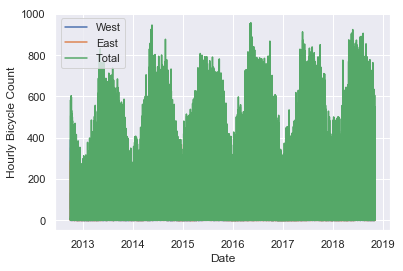

In [15]:
data.plot()
plt.ylabel("Hourly Bicycle Count")

In [16]:
from pandas.tseries import offsets

Text(0,0.5,'Weekly bicycle Count')

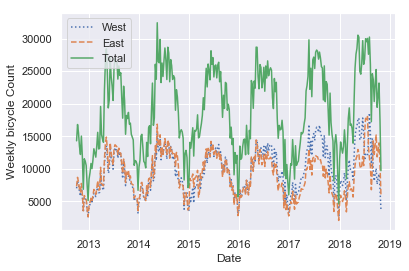

In [18]:
weekly = data.resample("W").sum()
weekly.plot(style=[":", "--", "-"])
plt.ylabel("Weekly bicycle Count")

Text(0,0.5,'mean of 30 days count')

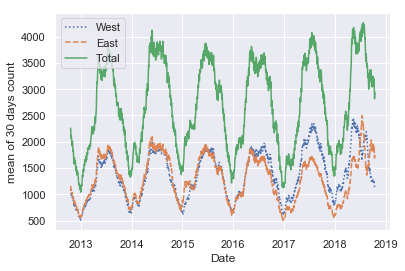

In [19]:
daily = data.resample("D").sum()
daily.rolling(30, center=True).mean().plot(style=[":", "--", "-"])
plt.ylabel("mean of 30 days count")

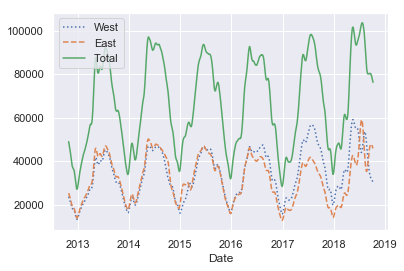

In [20]:
daily.rolling(50, center=True, win_type="gaussian").sum(std=10).plot(style=[":","--", "-"])

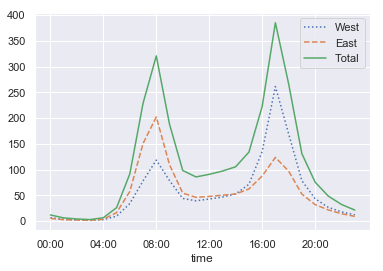

In [24]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[":", "--", "-"])

In [23]:
4 * 60 * 60 * np.arange(5)

array([    0, 14400, 28800, 43200, 57600])

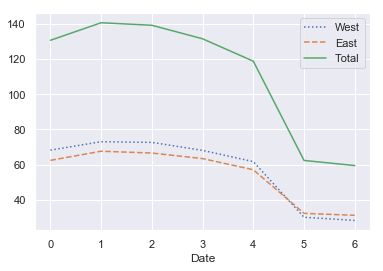

In [25]:
by_weekday = data.groupby(data.index.weekday).mean()

by_weekday.plot(style=[":", "--", "-"])

In [28]:
weekend = np.where(data.index.weekday < 5, "Weekday", "Weekend")
by_time = data.groupby([weekend, data.index.time]).mean()

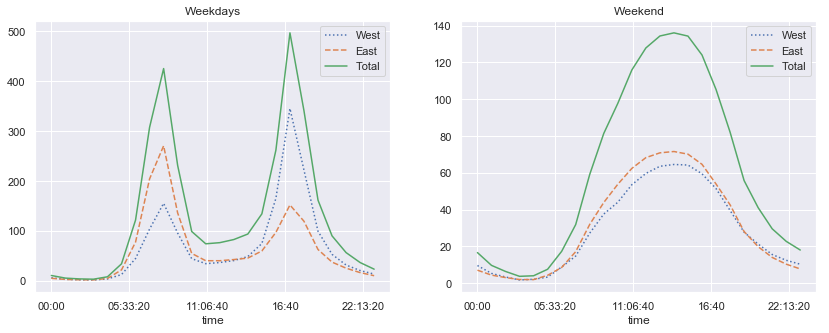

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc["Weekday"].plot(ax=ax[0], title="Weekdays", style=[":", "--", "-"])
by_time.loc["Weekend"].plot(ax=ax[1], title="Weekend", style=[":", "--", "-"])